In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend
from tensorflow.keras import Input, Model
from tensorflow.keras.backend import expand_dims, tile
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Reshape, concatenate, LeakyReLU, Lambda
from tensorflow.keras.layers import Activation, UpSampling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model



In [0]:


def euclidean_distance_loss(y_true, y_pred):
    return backend.sqrt(backend.sum(backend.square(y_pred - y_true), axis = -1))

def define_encoder():
  
    input_layer = Input(shape = (80, 80, 3))
  
    ## 1st Convolutional Block
    enc = Conv2D(filters = 32, kernel_size = 5, strides = 2, padding = 'same')(input_layer)
    # enc = BatchNormalization()(enc)
    enc = LeakyReLU(alpha = 0.2)(enc)
  
    ## 2nd Convolutional Block
    enc = Conv2D(filters = 64, kernel_size = 5, strides = 2, padding = 'same')(enc)
    enc = BatchNormalization()(enc)
    enc = LeakyReLU(alpha = 0.2)(enc)
  
    ## 3rd Convolutional Block
    enc = Conv2D(filters = 128, kernel_size = 5, strides = 2, padding = 'same')(enc)
    enc = BatchNormalization()(enc)
    enc = LeakyReLU(alpha = 0.2)(enc)
  
    ## 4th Convolutional Block
    enc = Conv2D(filters = 256, kernel_size = 5, strides = 2, padding = 'same')(enc)
    enc = BatchNormalization()(enc)
    enc = LeakyReLU(alpha = 0.2)(enc)
  
    ## Flatten layer
    enc = Flatten()(enc)
  
    ## 1st Fully Connected Layer
    enc = Dense(4096)(enc)
    enc = BatchNormalization()(enc)
    enc = LeakyReLU(alpha = 0.2)(enc)
  
    ## 2nd Fully Connected Layer
    enc = Dense(100)(enc)
  
  
    ## Create a model
    model = Model(inputs = [input_layer], outputs = [enc], name = 'encoder')
    
    model.compile(loss = euclidean_distance_loss,
                    optimizer = 'adam')
    return model

In [0]:
def train_encoder(encoder, generator, epochs=200, batch_size = 32, z_shape = 100):
    
      
    
    z_i = np.random.normal(0, 1, size = (5000, z_shape))
    
    y = np.random.randint(low = 0, high = 6, size = (5000, ),
                          dtype = np.int64)
    num_classes = len(set(y))
    y = np.reshape(np.array(y), [len(y), 1])
    y = to_categorical(y, num_classes = num_classes)
    
    history = []
    
    for epoch in range(epochs):
      
        encoder_losses = []
      
        number_of_batches = int(z_i.shape[0] / batch_size)
        print("Epoch: ", epoch, "Number of batches: ", number_of_batches)
        #print("Number of batches: ", number_of_batches)
      
        for index in range(number_of_batches):
            #print("Batch: ", index + 1)
        
            z_batch = z_i[index * batch_size: (index + 1) * batch_size]
            y_batch = y[index * batch_size: (index + 1) * batch_size]
        
            generated_images = generator.predict_on_batch([z_batch, y_batch])
        
        
            ## Train the encoder model
            encoder_loss = encoder.train_on_batch(generated_images, z_batch)
            #print("Encoder loss: ", encoder_loss)
        
            encoder_losses.append(encoder_loss)
            
        history.append({"encoder_loss":np.mean(encoder_losses)})
        #print("d_loss: {}".format(np.mean(encoder_losses)))
        
        
            ## Write the encoder loss to Tensorboard
            #write_log(tensorboard, "encoder_loss", np.mean(encoder_losses), epoch)
      
    ## Save the encoder model
    encoder.save_weights("/content/gdrive/My Drive/cGAN/V1/resultado/encoder_w.h5")
    return history

In [6]:
latent_dim = 100
n_classes = 6

#generator = define_generator(latent_dim, n_classes)
generator = load_model("/content/gdrive/My Drive/cGAN/V1/resultado/generator_0100.h5")

encoder = define_encoder()
#encoder.summary()

history = train_encoder(encoder, generator)

hist = pd.DataFrame(history)
plt.figure(figsize=(20,5))
for colnm in hist.columns:
    plt.plot(hist[colnm],label=colnm)
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

Epoch:  0 Number of batches:  156
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch:  1 Number of batches:  156
Epoch:  2 Number of batches:  156
Epoch:  3 Number of batches:  156
Epoch:  4 Number of batches:  156
Epoch:  5 Number of batches:  156
Epoch:  6 Number of batches:  156
Epoch:  7 Number of batches:  156
Epoch:  8 Number of batches:  156
Epoch:  9 Number of batches:  156
Epoch:  10 Number of batches:  156
Epoch:  11 Number of batches:  156
Epoch:  12 Number of batches:  156
Epoch:  13 Number of batches:  156
Epoch:  14 Number of batches:  156
Epoch:  15 Number of batches:  156
Epoch:  16 Number of batches:  156
Epoch:  17 Number of batches:  156
Epoch:  18 Number of batches:  156
Epoch:  19 Number of batches:  156
Epoch:  20 Number of batches:  156
Epoch:  21 Number of batches:  156
Epoch:  22 Number of batches:  156
Epoch:  23 Number of batches:  156
Epoch:  24 Number of batches:  156
Epoch:  25 Number of batches:  156
Epoch:

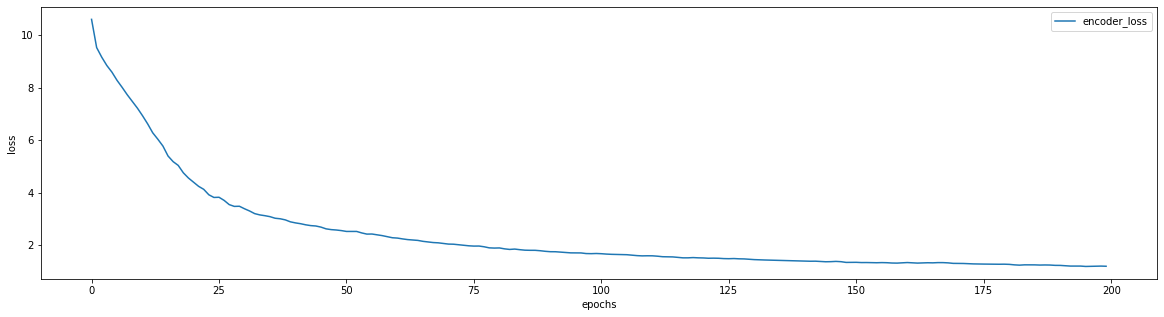

In [7]:
hist = pd.DataFrame(history)
plt.figure(figsize=(20,5))
for colnm in hist.columns:
    plt.plot(hist[colnm],label=colnm)
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [0]:
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(64, 64))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 64, 64, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(model, nombre_imagen):
    # load the image
    img = load_image(nombre_imagen)
    # load model
    model.load_weights('/home/icaceres/Documentos/IA/TFM/version1GAN/resultado/encoder.h5')
    # predict the class
    result = model.predict(img)
    #print(mapa_etiquetas[result[0]])
    return result

In [0]:
encoder = define_encoder()
result_ecoder = run_example(encoder, "/home/icaceres/Documentos/IA/TFM/modelos/dataset/img_crop/005160.jpg")
print(result_ecoder.shape)

(1, 100)


In [0]:
y = np.array([0.,0.,0.,0.,0.,1.])
y = y.reshape(1, 6)
result_gen = generator.predict([result_ecoder, y])

In [0]:
print(result_gen.shape)

(1, 64, 64, 3)


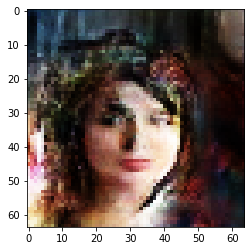

In [0]:
result_gen = (result_gen + 1) / 2.0
plt.imshow(result_gen[0, :, :, :])

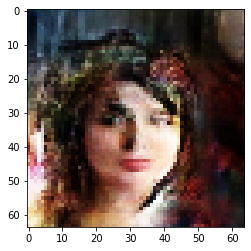

In [0]:
y = np.array([0.,0.,1.,0.,0.,0.])
y = y.reshape(1, 6)
result_gen = generator.predict([result_ecoder, y])

result_gen = (result_gen + 1) / 2.0
plt.imshow(result_gen[0, :, :, :])

In [0]:
def gen_y():
    y = np.array([[1.,0.,0.,0.,0.,0.], [0.,1.,0.,0.,0.,0.]
                 ,[0.,0.,1.,0.,0.,0.],[0.,0.,0.,1.,0.,0.],[0.,0.,0.,0.,1.,0.],[0.,0.,0.,0.,0.,1.]])
    return y
def gen_x(result_ecoder):
    x = np.array([result_ecoder[0], result_ecoder[0]
                 ,result_ecoder[0],result_ecoder[0],result_ecoder[0],result_ecoder[0]])
    return x

In [0]:
y_batch = gen_y()
x_batch = gen_x(result_ecoder)
print(y_batch)
print(x_batch.shape)
#result_gen = generator.predict([result_ecoder, y_batch])

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
(6, 100)


In [0]:
result_gen = generator.predict([x_batch, y_batch])

In [0]:
result_gen.shape

(6, 64, 64, 3)

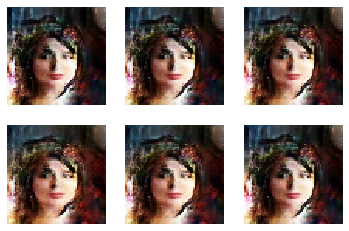

In [0]:
result_gen = (result_gen + 1) / 2.0
# plot images
for i in range(6):
    # define subplot
    plt.subplot(2, 3, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(result_gen[i, :, :, :])
plt.show()